<h1 style="font-family:verdana; text-align: center;"> AI or Real? Image Classification Challenge </h1>

<p style="text-align: center; color:#0404e2; font-family:verdana; font-size: 24px; font-weight: bold;">
    ANDRÉS MEMBRILLO PÉREZ
    <br>
    <br>
    <a href="https://github.com/AndresMembrillo" style="color: #159364; text-decoration: underline; font-size: 24px;" target="_blank">GitHub</a>
</p>

![robot.png](https://img.freepik.com/premium-photo/arafed-robot-painting-canvas-messy-room-with-window-generative-ai_927978-24454.jpg?w=1060)

<h2>  <center> Where is the data coming from?</center> </h2>

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em;">
    📌 &nbsp;In response to the rise of AI-generated images, our challenge is to develop a Convolutional Neural Network (CNN) model that distinguishes between authentic and AI-generated images, ensuring reliability in digital content.
</div>




<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
📍Information about the data
    
Original data can be found at the following link. It contains more than 15,000 artwork images with each and every label verified:
https://www.kaggle.com/datasets/kausthubkannan/ai-and-human-art-classification/data    
</p>
</div>


# **1 - IMPORTING LIBRARIES**

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import tensorflow
from keras import models
from keras import layers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array, array_to_img, ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout

# **2 - DOWNLOADING DATA**

In [2]:
# od.download('https://www.kaggle.com/datasets/kausthubkannan/ai-and-human-art-classification')

# **3 - LOADING PATHS**

In [3]:
base_dir = 'ai-and-human-art-classification\\ai_art_classification'
train_dir = os.path.join(base_dir, 'train')
real_train_dir = os.path.join(train_dir, 'NON_AI_GENERATED')
ai_train_dir = os.path.join(train_dir, 'AI_GENERATED')

# **4 - IMAGE SIZE SELECTION**

In [4]:
#REAL IMAGE SIZE = (512,512)
def process_image(image, size):
    if size == (256, 256):
        print("Waiting for image processing with size (256, 256)...")
    elif size == (128, 128):
        print("Waiting for image processing with size (128, 128)...")
    elif size == (64, 64):
        print("Waiting for image processing with size (64, 64)...")
    else:
        print("Invalid image size")

print("Please choose the image size:")
print("1. Size (256, 256) (high waiting time)")
print("2. Size (128, 128) (medium waiting time)")
print("3. Size (64, 64) (low waiting time)")

option = None
while option not in [1, 2, 3]:
    option = input("Enter the number corresponding to the desired size: ")
    try:
        option = int(option)
        if option not in [1, 2, 3]:
            print("Invalid option. Please enter 1, 2, or 3.")
    except ValueError:
        print("Invalid input. Please enter a number.")

if option == 1:
    IMG_SIZE = (256, 256)
elif option == 2:
    IMG_SIZE = (128, 128)
elif option == 3:
    IMG_SIZE = (64, 64)

print("You have selected size:", IMG_SIZE)

Please choose the image size:
1. Size (256, 256) (high waiting time)
2. Size (128, 128) (medium waiting time)
3. Size (64, 64) (low waiting time)
Enter the number corresponding to the desired size: 1
You have selected size: (256, 256)


In [5]:
IMG_SIZE

(256, 256)

# **5 - DATA VISUALIZATION**

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #add8e6; color: #000000;">
    &nbsp; The two categories of the data are:<br>
    🔴AI_GENERATED<br>
    🔴NON_AI_GENERATED<br>
</div>

In [6]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [7]:
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='training',  
    shuffle=True
)

validation_generator = datagen.flow_from_directory(
    train_dir,
    target_size=IMG_SIZE,
    batch_size=32,
    class_mode='binary',
    subset='validation',  
    shuffle=False
)

Found 14895 images belonging to 2 classes.
Found 3723 images belonging to 2 classes.


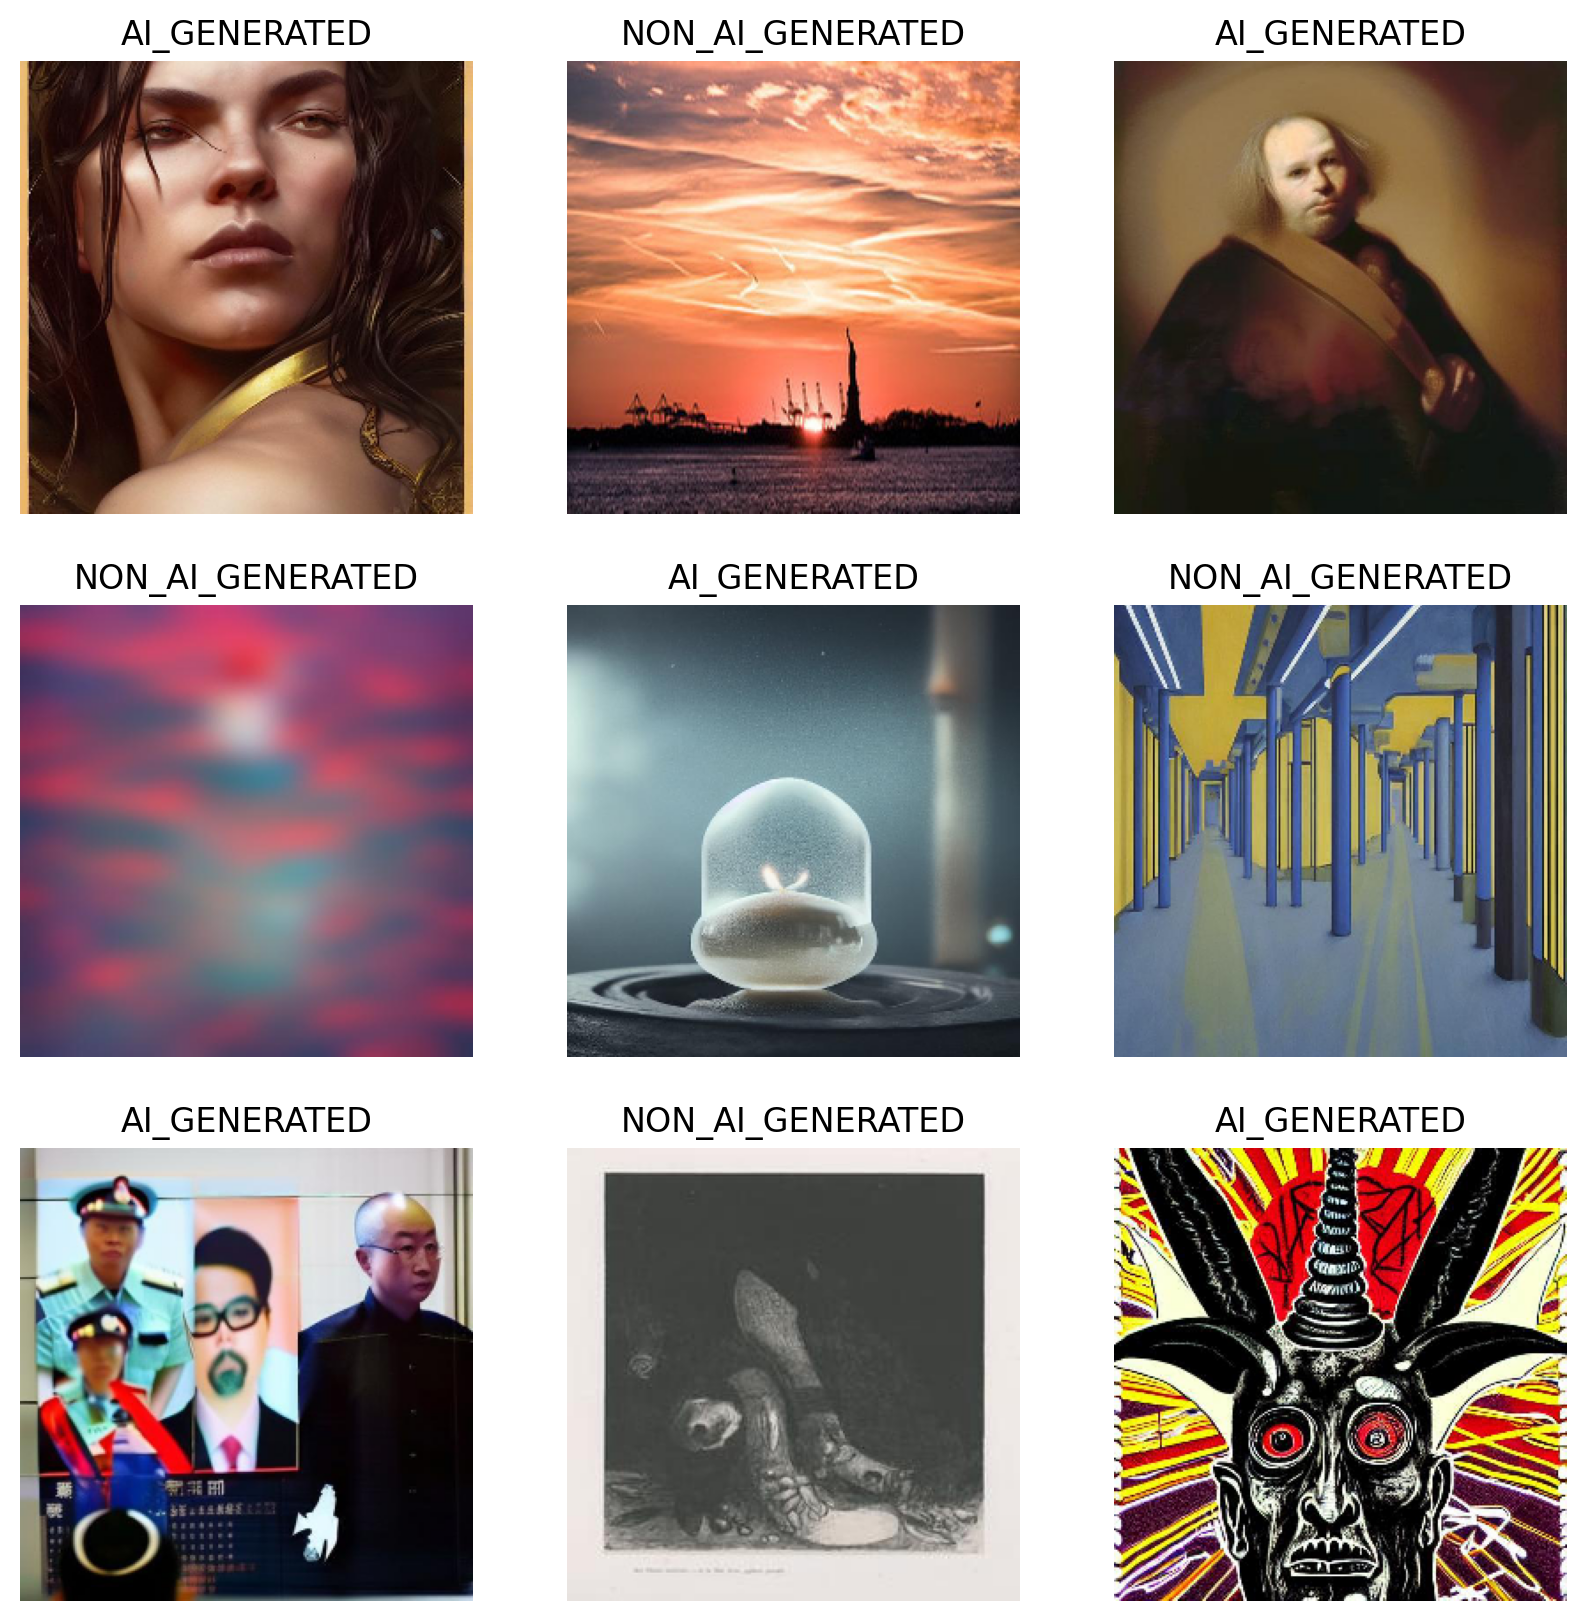

In [8]:
real_images, real_labels = train_generator.next()
ai_images, ai_labels = validation_generator.next()

fig, axes = plt.subplots(3, 3, figsize=(10, 10), dpi=200)

for i, ax in enumerate(axes.flat):
    if i % 2 == 0:
        img = ai_images[i // 2]
        label = 'AI_GENERATED'
    else:
        img = real_images[i // 2]
        label = 'NON_AI_GENERATED'
        
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')

plt.show()

# 6 - METRIC FOR EVALUATION

<div class="alert alert-block alert-info" style="font-size:14px; font-family:verdana; line-height: 1.7em; background-color: #3c0000; color: #f4f4f4;">
    📌 &nbsp; 
In a binary classification task like distinguishing between "AI_GENERATED" and "NON_AI_GENERATED" images, accuracy is a fundamental metric for evaluating model performance. It measures the ratio of correct predictions to the total number of predictions. With balanced class distribution, accuracy provides a comprehensive evaluation of the model's classification accuracy for both categories.

</div>


# **7 - MODEL |  PRE-TRAINED CNN**

In [9]:
conv_base = tensorflow.keras.applications.VGG16(weights='imagenet', 
                                        include_top=False,  
                                        input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3))

In [10]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [11]:
model = models.Sequential()
model.add(conv_base) 
model.add(layers.Flatten())
model.add(layers.Dense(100, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 100)               3276900   
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                                 
Total params: 17,991,689
Trainable params: 17,991,689
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.compile(loss='binary_crossentropy',
              optimizer=tensorflow.keras.optimizers.RMSprop(learning_rate=2e-5),
              metrics=['accuracy'])

In [14]:
history= model.fit(
    train_generator,
    steps_per_epoch=32, 
    epochs=10, 
    shuffle=True,
    validation_data=validation_generator,
    validation_steps=20) 

Epoch 1/10
32/32 [==============================] - 994s 31s/step - loss: 0.5341 - accuracy: 0.7148 - val_loss: 0.9726 - val_accuracy: 0.4359
Epoch 2/10
32/32 [==============================] - 1063s 33s/step - loss: 0.3850 - accuracy: 0.8174 - val_loss: 0.1458 - val_accuracy: 0.9391
Epoch 3/10
32/32 [==============================] - 985s 31s/step - loss: 0.3858 - accuracy: 0.8252 - val_loss: 0.1082 - val_accuracy: 0.9641
Epoch 4/10
32/32 [==============================] - 938s 29s/step - loss: 0.3006 - accuracy: 0.8701 - val_loss: 0.4688 - val_accuracy: 0.7922
Epoch 5/10
32/32 [==============================] - 933s 29s/step - loss: 0.2926 - accuracy: 0.8750 - val_loss: 0.2653 - val_accuracy: 0.8891
Epoch 6/10
32/32 [==============================] - 934s 29s/step - loss: 0.3131 - accuracy: 0.8730 - val_loss: 0.1466 - val_accuracy: 0.9406
Epoch 7/10
32/32 [==============================] - 929s 29s/step - loss: 0.2450 - accuracy: 0.8997 - val_loss: 0.4322 - val_accuracy: 0.8219
Epoch

117/117 [==============================] - 836s 7s/step


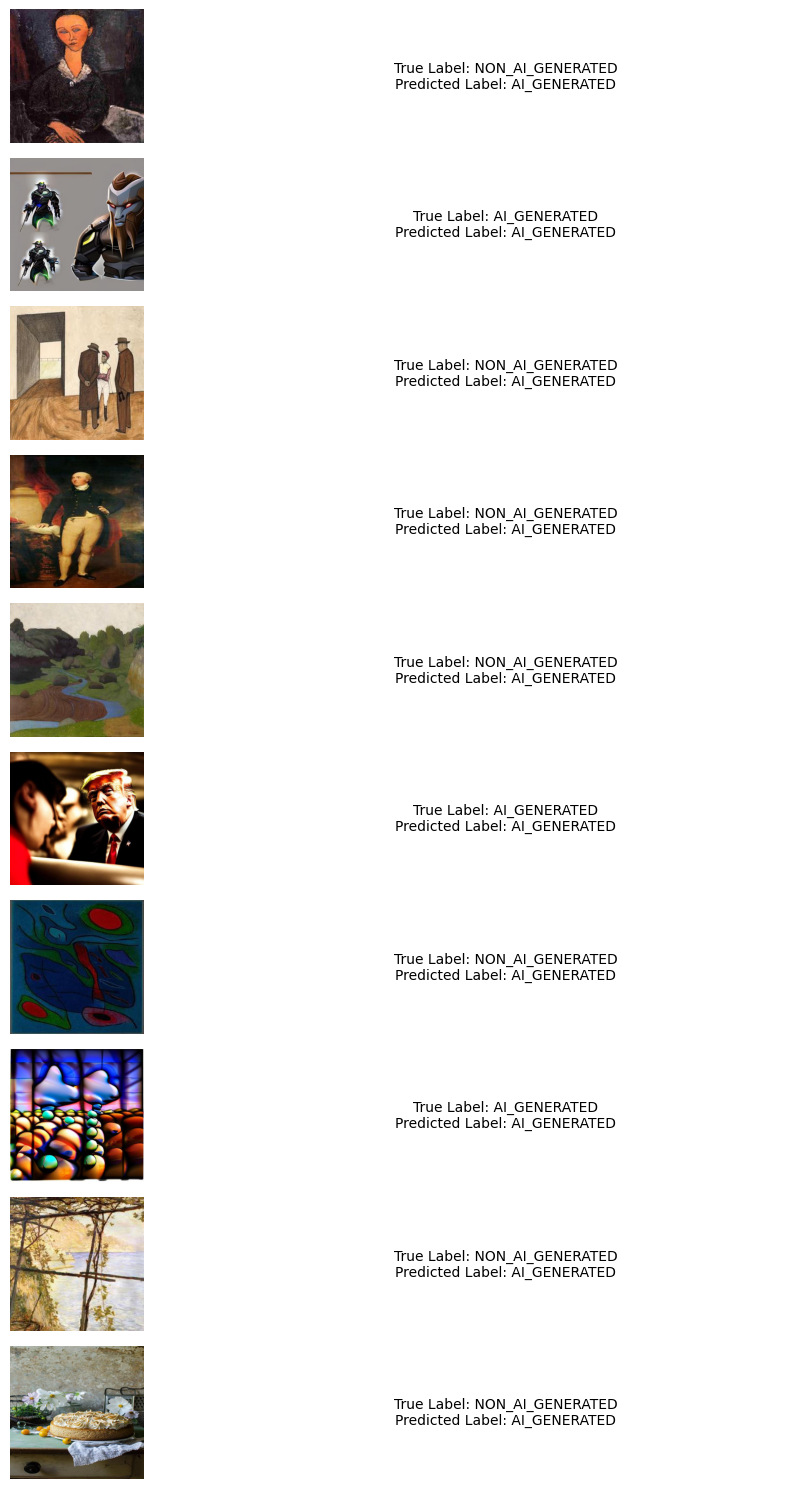

In [15]:
random_indices = np.random.choice(len(validation_generator.filenames), size=10, replace=False)
random_images = [validation_generator.filenames[i] for i in random_indices]

predictions = model.predict(validation_generator)

true_labels = [validation_generator.classes[i] for i in random_indices]

predicted_labels = [np.argmax(predictions[i]) for i in range(len(predictions))]

class_labels = list(validation_generator.class_indices.keys())

plt.figure(figsize=(10, 15))
for i, image_path in enumerate(random_images):
    image = plt.imread(os.path.join(validation_generator.directory, image_path))
    plt.subplot(10, 2, 2*i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.subplot(10, 2, 2*i + 2)
    plt.text(0.5, 0.5, f'True Label: {class_labels[true_labels[i]]}\nPredicted Label: {class_labels[predicted_labels[i]]}',
             fontsize=10, ha='center', va='center')
    plt.axis('off')
plt.tight_layout()
plt.show()

# **8 - ACCURACY PLOT**

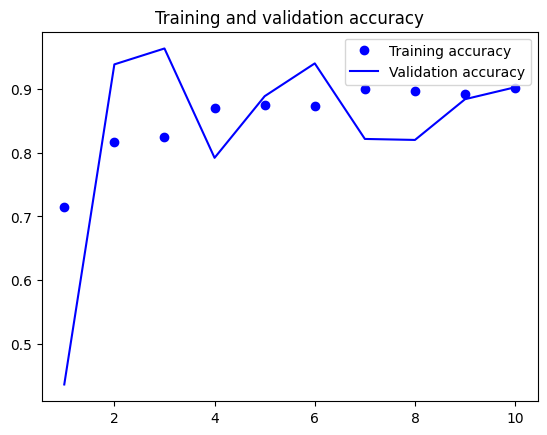

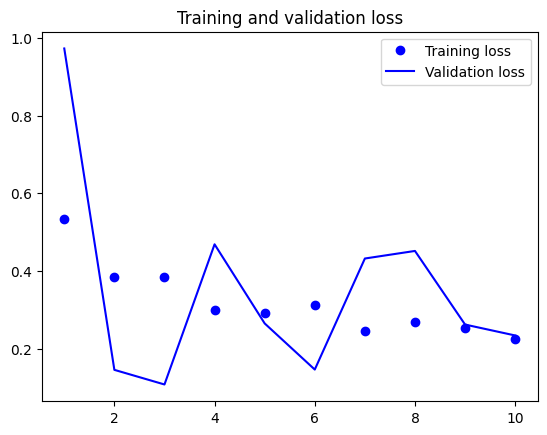

In [16]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy') 
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# **9 - CONCLUTION**


<blockquote><p style="font-size:16px; color:#159364; font-family:verdana;">💬 The model has an accuracy of 0.90 with the data we have worked with. The current model is a prototype 1.0 that has been trained on AI-generated artwork images as well as non-AI-generated images. The goal is to train it with images from different segments. For example, it can compare AI-generated dog images with real dog images, or focus solely on comparisons among humans. The objective is to achieve a model that maintains consistent performance across different data types.</p></blockquote>